## Imports

In [29]:
import sys
sys.path.append("/N/u/jmelms/BigRed200/FCN_Otis/data_analysis") # I know this a terrible kludgey fix, but I don't have a better one right now
from processing_utils import process_fcn_output

import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

from pathlib import Path
from time import perf_counter_ns

## Load and Process Data

All of the actual work is handled in the "processing utils" function called below - see `/N/u/jmelms/BigRed200/FCN_Otis/data_analysis/processing_utils.py` to modify the config for loading data, or the obsolete notebook somewhere around here that details it further. If you modify the util function and want to see the notebook update, you'll have to restart the kernel to reload modules (they all get cached by default), or you can add the "autoreload" extension.

In [30]:
start = perf_counter_ns()
pred, time = process_fcn_output()
stop = perf_counter_ns()

diff = stop - start
print(f"Loading and processing data took {diff/1_000_000_000} seconds\n\n")
print(f"Example: IC #18 times \n{time[18]}\n\n")
print("Data: ")
pred

Loading and processing data took 0.04127885 seconds


Example: IC #18 times 
[cftime.DatetimeProlepticGregorian(2023, 10, 19, 12, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 19, 18, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 0, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 6, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 12, 0, 0, 6, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(2023, 10, 20, 18, 0, 0, 6, has_year_zero=True)]


Data: 


<xarray.DataArray 'predicted' (ic: 39, t: 6, channel: 20, lat: 720, lon: 1440)>
[4852224000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.0 -89.25 -89.5 -89.75
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * channel  (channel) <U5 'u10' 'v10' 't2m' 'sp' ... 'z50' 'r500' 'r850' 'tcwv'
Dimensions without coordinates: ic, t

## Exploration

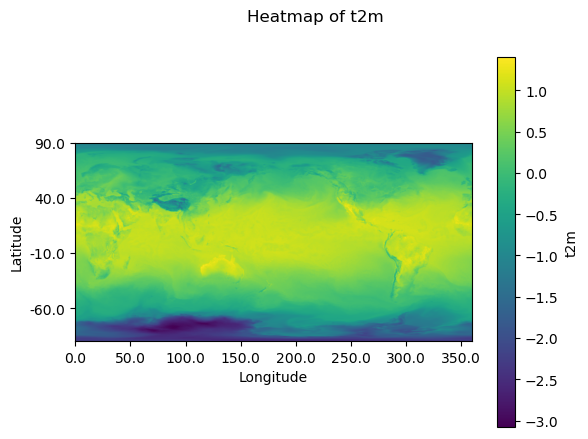

[   0  200  400  600  800 1000 1200 1400]


In [32]:
def context():
    ic = 0
    t = 0
    channel = "t2m"
    units = "degC"
    tstep = pred.sel(ic=ic, t=t, channel=channel)
    xticks = np.arange(0, tstep.lon.values.size, 200)
    yticks = np.arange(0, tstep.lat.values.size, 200)
    xticklabs = tstep.lon.values[xticks]
    yticklabs = tstep.lat.values[yticks]
    
    fig, ax = plt.subplots()
    ax.imshow(tstep, cmap='viridis')
    norm = Normalize(vmin=tstep.min(), vmax=tstep.max())
    cmap = cm.viridis
    scalar_mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(scalar_mappable, label=channel, ax=ax)
    fig.suptitle(f'Heatmap of {channel}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.set_xticks(xticks, xticklabs)
    ax.set_yticks(yticks, yticklabs)
    fig.savefig("init.png", dpi=300)
    plt.show()
    
    print(xticks)

context()